<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/Applications/1-Simple_Random_Walk/Simple_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Random Walk

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/app-random-walk.html). A copy of the prompt along with the completed exercise can be found under [/Applications](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/Applications).

###Summary
Two equally matched opponents are competing in a game in which changes in score occur often and in one point increments. (Imagine a basketball game in which every basket counts only one point.) We’ll use simulation to investigate the following questions.

1. Which is more likely: that one team leads for most of the game, or that the lead tends to change frequently over the course of the game?
2. When would you expect the largest lead (or deficit) to occur — near the beginning, the end, or in the middle of the game? (If the largest lead (or deficit) is attained at several points in the game, when you do expect it to first occur?)
3. When would you expect the last tie to occur — near the beginning, the end, or in the middle of the game?

###Hypothesis

1. I would think if the opponents are competitive, then that would lead to the frequent change of leads.
2. I think they could happen at any time. I don't think there would be a skew to one point of the game or another.
3. Again if it is competitive, I would think that the last tie would occur at the end of the game.

$A = \text{Team A score} \qquad B = \text{Team B score} \qquad n = \text{Total scores}$

$X_n = A-B \qquad \text{After first n scores}$

$X_0 = 0$

$2n = \text{steps} $

$T = \text{Last tie} \qquad L = \text{Total time A leads} \qquad M = \text{First time max differential} \qquad $

---

## Application

Write your own code to conduct and run a simulation to approximate the distribution of each of $T/(2n)$, $L/(2n)$, and $M/(2n)$ for $n=100$. Summarize the results with appropriate plots and summary statistics, and describe the distributions.


In [1]:
pip install symbulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 651.4 kB/s eta 0:00:00


In [2]:
from symbulate import *
%matplotlib inline

In [43]:
#Setting up based on prompt
n = 100
steps = 2*n

#Following and modifying Random Processes section from symbulate documentation
P = Bernoulli(0.5)**steps
Z = RV(P)
A = RandomProcess(P, Naturals())
B = RandomProcess(P, Naturals())

A[0] =  0
B[0] =  0
for i in range(steps):
    if i%2 == 0:
      A[i+1] = A[i] + Z[i+1]  # Has possession - Possibility to score
      B[i+1] = B[i]           # Defense!
    else:
      A[i+1] = A[i]           # Defense!
      B[i+1] = B[i] + Z[i+1]  # Has possession - Possibility to score

#create process to show differential
X = A - B



In [46]:
#To see A score over time
#A.sim(1).plot(alpha = 1, tmin = 0, tmax = 100)

In [42]:
#To see B score over time
#B.sim(1).plot(alpha = 1, tmin = 0, tmax = 100)

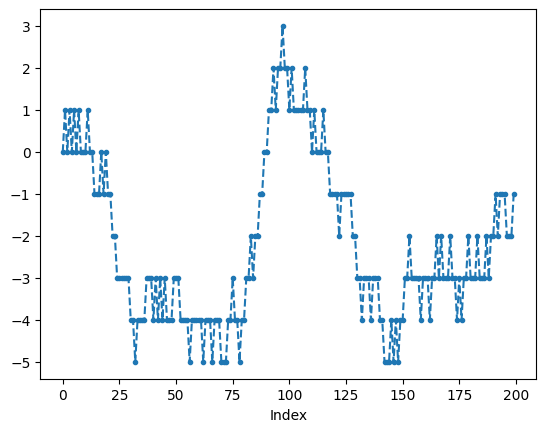

In [56]:
#To see A - B differential over time
games = X.sim(1)
games.plot(alpha = 1, tmin = 0, tmax = 200)

In [67]:
def last_tie(x):
    last_tie_index = 0
    for i in range(steps):
        if x[i] == 0:
            last_tie_index = i
    return last_tie_index

tie = games.apply(last_tie).get(0)
msg = "The last tie was at step {}, {:.2f}% through the game.".format(tie, (tie/steps)*100)
print(msg)

The last tie was at step 117. 58.50% through the game


In [68]:
def time_lead_A(x):
    time_lead = 0
    for i in range(steps):
        if x[i] > 0:
            time_lead += 1
    return time_lead

lead = games.apply(time_lead_A).get(0)
msg = "The total time team A held the lead was {} steps, {:.2f}% of the game.".format(lead,(lead/steps)*100)
print(msg)

The total time team A held the lead was 26 steps, 13.00% of the game.


In [70]:
def max(x):
    max_num = 0
    for i in range(steps):
        if abs(x[i]) > max_num:
              max_num = abs(x[i])
    return max_num

# diff_max = games.apply(max).get(0)
# msg = "The greatest differential in the game was {} points.".format(diff_max)
# print(msg)

In [72]:
def maxi(x):
    max_num = max(x)
    maxi = 0
    for i in range(steps):
      if abs(x[i]) == max_num:
            maxi = abs(i)
            return maxi

diff_maxi = games.apply(maxi).get(0)
msg = "The greatest differential in the game of {} occured at step {}, {:.2f}% through the game.".format(diff_max, diff_maxi, (diff_maxi/steps)*100)
print(msg)

The greatest differential in the game of 5 occured at step 32, 16.00% through the game.


Consider the three questions at the start of this page; what do your simulation results suggest? Write a brief report summarizing your results and conclusions.
